In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import tensorflow_datasets as tfds  # Ensure you're importing tensorflow_datasets


# Load the MNIST dataset
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
dataset = tfds.load('emnist/letters', as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']
# 70000 images in MNIST dataset

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\admin\tensorflow_datasets\emnist\letters\incomplete.LWZ6A0_3.1.0\emnist-train.tfrecord*...:…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\admin\tensorflow_datasets\emnist\letters\incomplete.LWZ6A0_3.1.0\emnist-test.tfrecord*...: …

Dataset emnist downloaded and prepared to C:\Users\admin\tensorflow_datasets\emnist\letters\3.1.0. Subsequent calls will reuse this data.


x_train shape: (88800, 28, 28, 1), y_train shape: (88800,)
x_test shape: (14800, 28, 28, 1), y_test shape: (14800,)


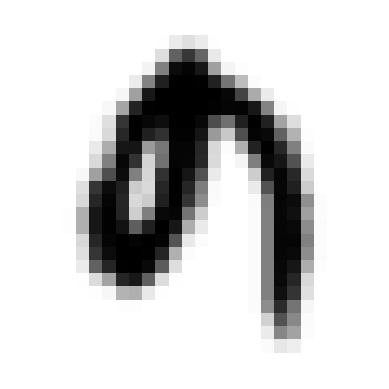

In [5]:
x_train = []
y_train = []

for image, label in tfds.as_numpy(train_data):
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

# Convert the testing dataset to NumPy arrays
x_test = []
y_test = []

for image, label in tfds.as_numpy(test_data):
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Check shapes
some_digit=x_train[810]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [6]:
y_train[810]

np.int64(5)

Size of the dataset: 103600
Number of elements in the training set: 88800
Number of elements in the test set: 14800


x_train shape: (88800, 28, 28, 1), y_train shape: (88800,)
x_test shape: (14800, 28, 28, 1), y_test shape: (14800,)
Test accuracy: 0.8308


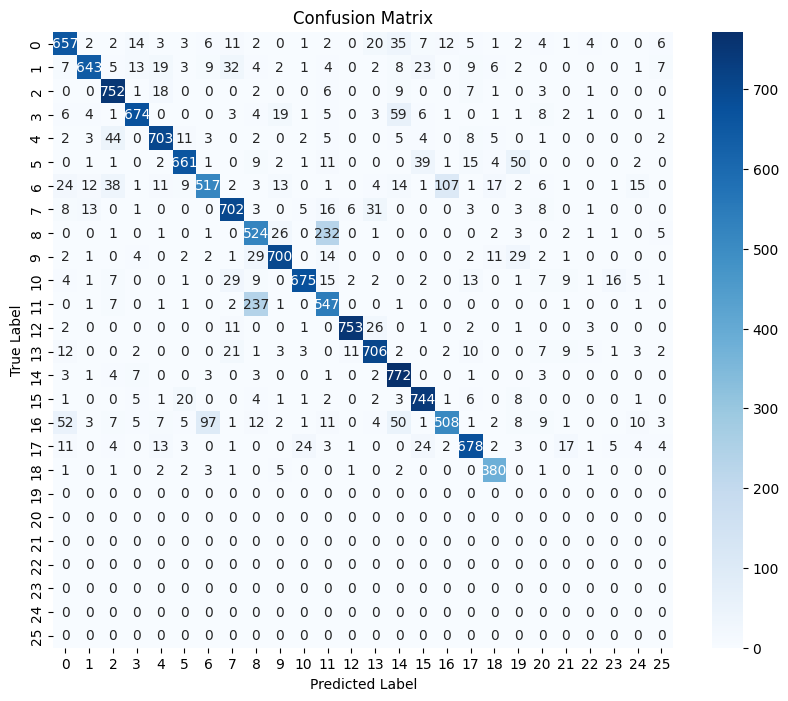

In [17]:
# # (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# dataset = tfds.load('emnist/letters', as_supervised=True)
# train_data, test_data = dataset['train'], dataset['test']
# x_train = x_train.reshape(60000, 784)
# x_test = x_test.reshape(10000, 784)

# knn = KNeighborsClassifier(n_neighbors=1)

# knn.fit(x_train, y_train)

# y_pred = knn.predict(x_test)

# accuracy = knn.score(x_test, y_test)
# print(f"Test accuracy: {accuracy:.4f}")

# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()
dataset = tfds.load('emnist/letters', as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

# Convert the training dataset to NumPy arrays
x_train, y_train = [], []
for image, label in tfds.as_numpy(train_data):
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

# Convert the testing dataset to NumPy arrays
x_test, y_test = [], []
for image, label in tfds.as_numpy(test_data):
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Check shapes

# Reshape the data to (n_samples, 784)
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

# Predict on test data
y_pred = knn.predict(x_test)

# Evaluate accuracy
accuracy = knn.score(x_test, y_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Test accuracy: 0.6995


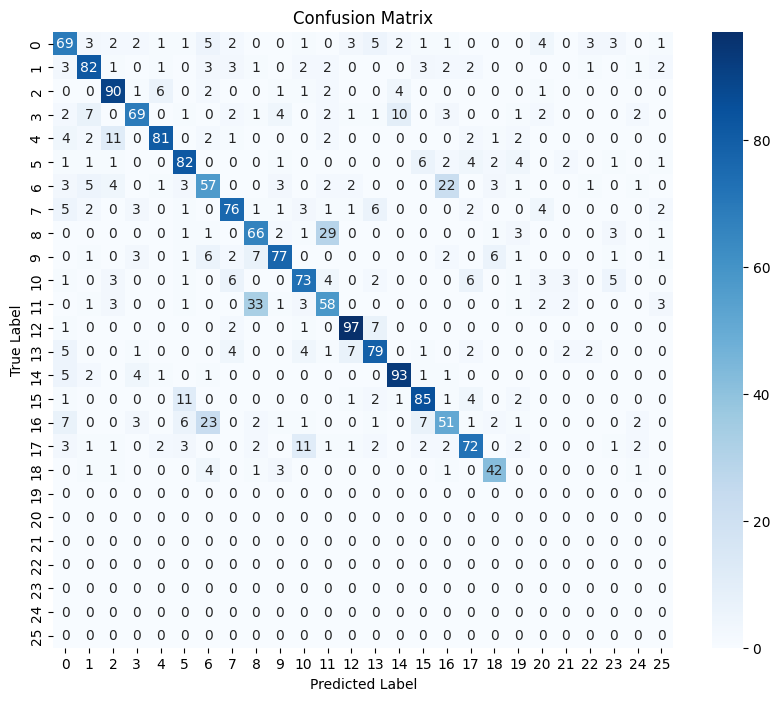

Size of the dataset: 12000
Number of elements in the training set: 10000
Number of elements in the test set: 2000


In [10]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
dataset = tfds.load('emnist/letters', as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=10000, random_state=42, stratify=y_train)
x_test, _, y_test, _ = train_test_split(x_test, y_test, train_size=2000, random_state=42, stratify=y_test)

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

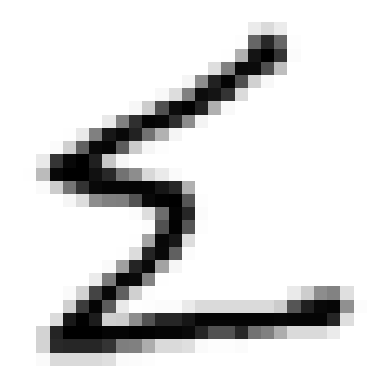

In [12]:
some_digit=x_test[800]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [13]:
y_pred[400]

np.int64(10)

In [14]:
y_test[400]

np.int64(2)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Test Accuracy: 0.6837


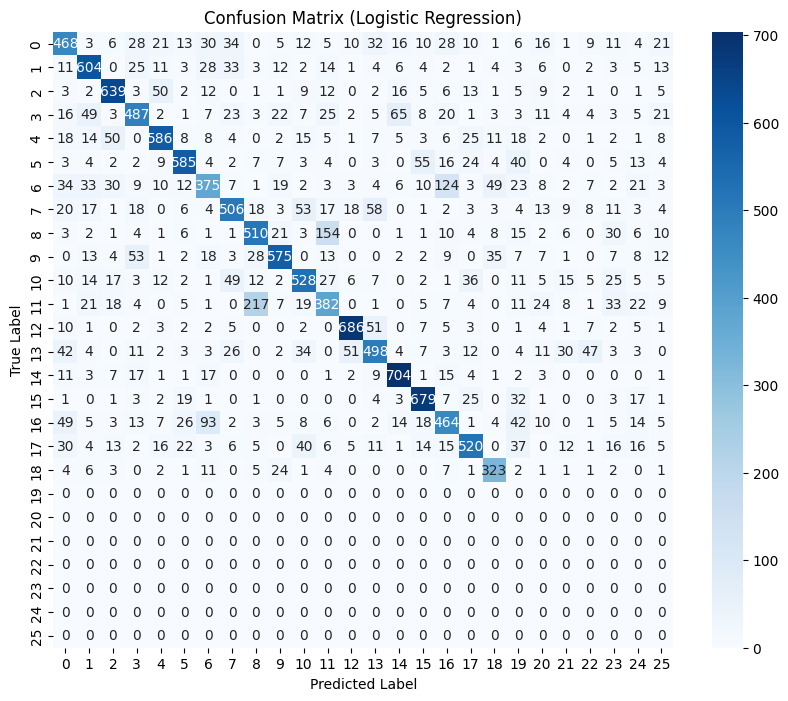

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_flat, y_train)

y_pred_logreg = logreg.predict(x_test_flat)

accuracy = logreg.score(x_test_flat, y_test)

cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

x_train shape: (88800, 28, 28, 1), y_train shape: (88800,)
x_test shape: (14800, 28, 28, 1), y_test shape: (14800,)
Test accuracy: 0.6724


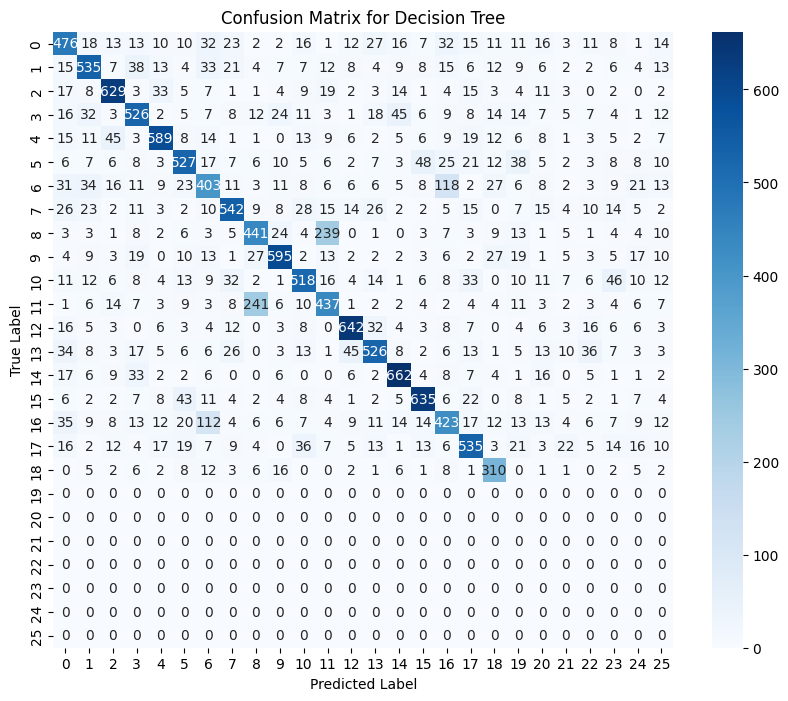

In [18]:
from sklearn.tree import DecisionTreeClassifier
dataset = tfds.load('emnist/letters', as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

dataset = tfds.load('emnist/letters', as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

# Convert the training dataset to NumPy arrays
x_train, y_train = [], []
for image, label in tfds.as_numpy(train_data):
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

# Convert the testing dataset to NumPy arrays
x_test, y_test = [], []
for image, label in tfds.as_numpy(test_data):
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Check shapes

# Reshape the data to (n_samples, 784)
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)

accuracy = dt_classifier.score(x_test, y_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

x_train shape: (88800, 28, 28, 1), y_train shape: (88800,)
x_test shape: (14800, 28, 28, 1), y_test shape: (14800,)
x_train dtype: float32, y_train dtype: int64
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5795 - loss: 1.4348 - val_accuracy: 0.8625 - val_loss: 0.4512
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8409 - loss: 0.5114 - val_accuracy: 0.8838 - val_loss: 0.3644
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8689 - loss: 0.4134 - val_accuracy: 0.8958 - val_loss: 0.3254
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8806 - loss: 0.3701 - val_accuracy: 0.9071 - val_loss: 0.2928
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8928 - loss: 0.3399 - val_accuracy: 0.9101 - val_loss: 0.2825
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9008 - loss: 0.3151 - val_accuracy: 0.9175 - val_loss: 0.2617
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accura

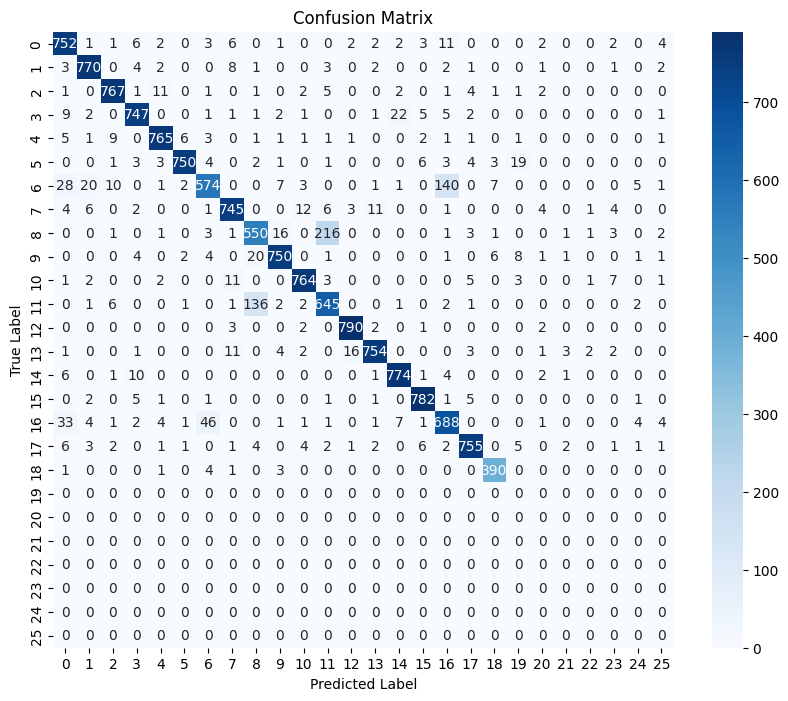

In [24]:
# dataset = tfds.load('emnist/letters', as_supervised=True)
# train_data, test_data = dataset['train'], dataset['test']
# # CNN Model( Artificial neural Network)
# x_train = x_train.astype("float32") / 255.0
# x_test = x_test.astype("float32") / 255.0
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)

# model = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28, 1)),
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dropout(0.5),
#         layers.Dense(10, activation="softmax"),
#     ]
# )

# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)

# loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
# print(f"Test loss: {loss:.4f}")
# print(f"Test accuracy: {accuracy:.4f}")

# y_pred = np.argmax(model.predict(x_test), axis=1)

# cm = confusion_matrix(y_test, y_pred)

# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()
# import tensorflow_datasets as tfds
# import tensorflow as tf
# from tensorflow.keras import layers, models
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# Load the EMNIST Letters dataset
dataset = tfds.load('emnist/letters', as_supervised=True)
train_data, test_data = dataset['train'], dataset['test']

# Prepare data
x_train, y_train = [], []
for image, label in tfds.as_numpy(train_data):
    x_train.append(image)
    y_train.append(label)

x_test, y_test = [], []
for image, label in tfds.as_numpy(test_data):
    x_test.append(image)
    y_test.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Adjust labels to start from 0
y_train = y_train - 1
y_test = y_test - 1

# Verify shapes and types

# Build and compile the CNN model
model = tf.keras.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(26, activation="softmax"),
    ]
)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

# Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()